# Binning spikes - excluding or including pauses in movie playback

In [3]:
import sys
import matplotlib.pyplot as plt

# Local application imports 
from database.db_setup import *
import preprocessing.data_preprocessing.binning as binning
import preprocessing.data_preprocessing.create_vectors_from_time_points as create

Please enter DataJoint username:  alana
Please enter DataJoint password:  ···············


Connecting alana@localhost:3306


Set parameters:

In [51]:
patient_id = 60
session_nr = 1
unit_nr = 0
bin_size = 1000

# Binning of spikes

### (1) Extract spike times from database

In [52]:
spike_times = get_spiking_activity(patient_id, session_nr, unit_nr)

### <font color='red'>(2) Decide whether you want to exclude pauses from the data and/or output the bin edges</font>

In [53]:
exclude_pauses = False
output_edges = True

### (3) Bin spikes

In [54]:
binned_spikes, edges = binning.bin_spikes(patient_id, session_nr, spike_times, bin_size, exclude_pauses, output_edges)

### (4) Plot binned spikes

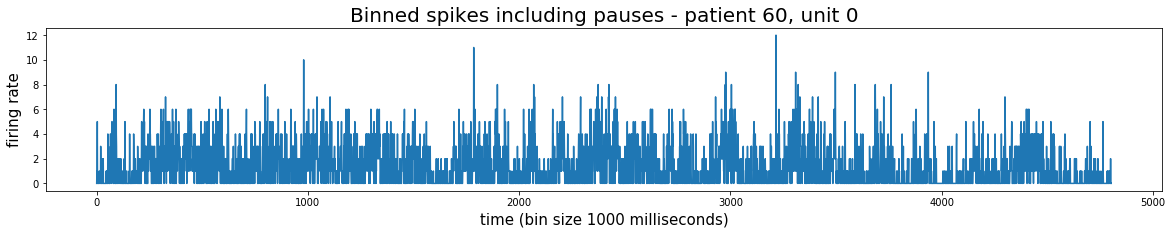

In [55]:
fig = plt.figure(figsize=(20,3))
plt.plot(binned_spikes)
if exclude_pauses:
    plt.title("Binned spikes excluding pauses - patient {}, unit {}".format(patient_id, unit_nr), fontsize=20)
else:
    plt.title("Binned spikes including pauses - patient {}, unit {}".format(patient_id, unit_nr), fontsize=20)
plt.xlabel("time (bin size {} milliseconds)".format(bin_size), fontsize=15)
plt.ylabel("firing rate", fontsize=15)
plt.show()